# Tugas Data Visualization 2

---

# Pendahuluan

Seperti yang telah dipelajari di dalam kelas, dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Import data 
house = pd.read_csv('Data Tugas 2/train_house.csv', index_col=0)
print('Jumlah variabel = ', len(house.columns))

Jumlah variabel =  80


Seperti yang dapat diamati, terdapat 80 variabel dalam dataset ini. Untuk itu, kita harus mengetahui makna dari tiap-tiap variabel tersebut supaya kita dapat memilih variabel mana saja yang akan kita pakai dalam analisis kita.

Deskripsi lengkap dari seluruh variabel yang ada dapat dilihat dari [penyedia data](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) pada bagian data description.

In [4]:
# Drop variabel NaN 
house = house.dropna(axis=1)

In [5]:
# Memisahkan data menjadi numerikal & kategorikal -- jangan diganti!
num_cols = house._get_numeric_data().columns
house_numerical = house[num_cols]
house_categorical = house.drop(num_cols, axis = 1)

# 1D Visualization 

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual` 

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	

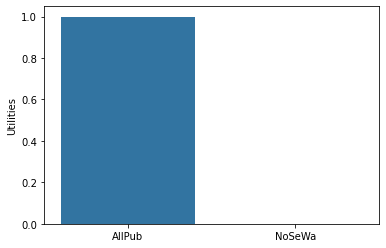

In [6]:
sns.barplot(y=house_categorical['Utilities'].value_counts(normalize=True), 
            x=house_categorical['Utilities'].value_counts().index)
plt.ylabel('Utilities')
plt.show()

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

<function matplotlib.pyplot.show(*args, **kw)>

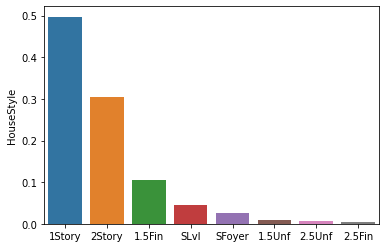

In [7]:
sns.barplot(y=house_categorical['HouseStyle'].value_counts(normalize=True), 
            x=house_categorical['HouseStyle'].value_counts().index)
plt.ylabel('HouseStyle')
plt.show

### ExterQual

ExterQual: Kualitas material eksterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

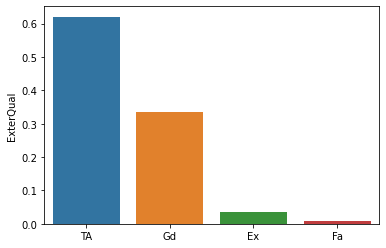

In [10]:
sns.barplot(y=house_categorical['ExterQual'].value_counts(normalize=True), 
            x=house_categorical['ExterQual'].value_counts().index)
plt.ylabel('ExterQual')
plt.show()

#### **Analisis tentang variabel kategorikal**

* Dari data kategorikal yang telah dibuat bar plot yaitu Utilities, HouseStyle, dan ExterQual. 
* Dapat dilihat bahwa untuk data kategori Utilities 100% data pada AllPub. 
* Pada data HouseStyle terdapat data yang imbalanced. Hampir 50% memiliki style properti satu lantai dan 50% lainnya beragam.
* Sama seperti variabel ExteQual, dapat dilihat bahwa variabel ExteQual datanya imbalanced. Lebih dari 60% properti memiliki kualitas Average dan 30% dalam kualitas Good. Sedangkan sisanya 10% berupa Excellent dan Fair.
* Dari data tersebut dapat ditanyakan:
    * Mengapa banyak properti yang memiliki satu lantai?
    * Apakah mereka lebih menyukai satu lantai?
    * Mengapa properti eksterior banyak yang Average?
    * Mengapa properti Excellent dan Good lebih sedikit?
    * Apakah variabel variabel tersebut mempengaruhi harga jual?


## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

Mean:  180921.19589041095
Media:  163000.0
Std Dev:  79415.29188606751


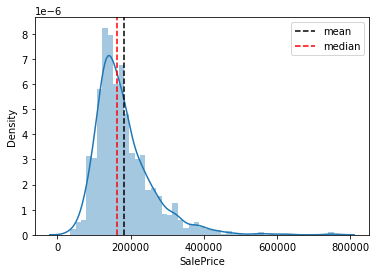

In [12]:
x = house_numerical['SalePrice']
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color='k', linestyle='--', label='mean')
line2 = plt.axvline(np.median(x), color='r', linestyle='--', label='median')
first_legend = plt.legend(handles=[line1, line2], loc=1)
print('Mean: ', x.mean())
print('Media: ', np.median(x))
print('Std Dev: ', np.std(x))
plt.show()

#### **Analisis tentang variabel `SalePrice`**

* Memiliki distribusi right-skewed.
* Terdapat banyak data pada kisaran 100,000 hingga 300,000 dengan kecenderungan harga di 163,000. Kenapa hal ini bisa terjadi?

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

Mean:  1515.463698630137
Media:  1464.0
Std Dev:  525.3003935623227


<function matplotlib.pyplot.show(*args, **kw)>

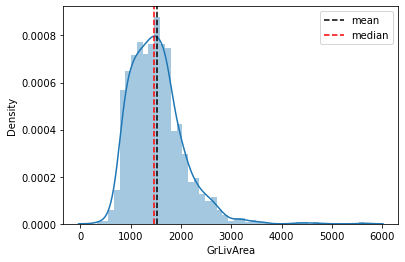

In [13]:
x = house_numerical['GrLivArea']
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color='k', linestyle='--', label='mean')
line2 = plt.axvline(np.median(x), color='r', linestyle='--', label='median')
first_legend = plt.legend(handles=[line1, line2], loc=1)
print('Mean: ', x.mean())
print('Media: ', np.median(x))
print('Std Dev: ', np.std(x))
plt.show

#### **Analisis tentang variabel `GrlivArea`**

* Memiliki distribusi cenderung right-skewed.
* Terdapat banyak data luas area pada range 1000 hingga 2500. Mengapa luas area tersebut banyak diminati?

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

Mean:  472.9801369863014
Media:  480.0
Std Dev:  213.73160807515626


<function matplotlib.pyplot.show(*args, **kw)>

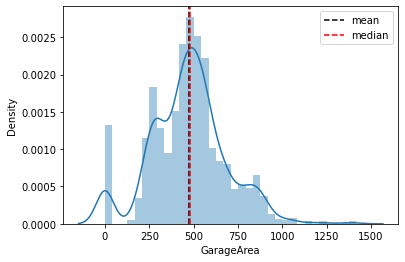

In [14]:
x = house_numerical['GarageArea']
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color='k', linestyle='--', label='mean')
line2 = plt.axvline(np.median(x), color='r', linestyle='--', label='median')
first_legend = plt.legend(handles=[line1, line2], loc=1)
print('Mean: ', x.mean())
print('Media: ', np.median(x))
print('Std Dev: ', np.std(x))
plt.show

#### **Analisis tentang variabel `GarageArea`**

* Distribusi cenderung normal dengan terdapat outlier data.
* Terdapat data yang mendekati 0. Dengan arti terdapat beberapa properti yang tidak memiliki garasi. 
* Secara umum variabel ini berada pada kisaran 250 hingga 750.

## Pemrosesan Data

Mean:  5.221978956475628
Media:  5.212187604403958
Std Dev:  0.17342032112458186


<function matplotlib.pyplot.show(*args, **kw)>

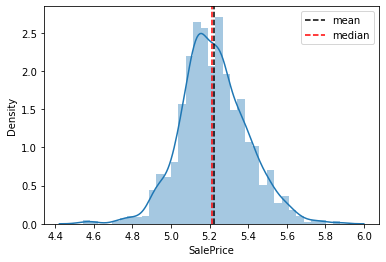

In [15]:
x = np.log10(house_numerical['SalePrice'])
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color='k', linestyle='--', label='mean')
line2 = plt.axvline(np.median(x), color='r', linestyle='--', label='median')
first_legend = plt.legend(handles=[line1, line2], loc=1)
print('Mean: ', x.mean())
print('Media: ', np.median(x))
print('Std Dev: ', np.std(x))
plt.show

Mean:  3.156354310389778
Media:  3.165541076722373
Std Dev:  0.14480949091518763


<function matplotlib.pyplot.show(*args, **kw)>

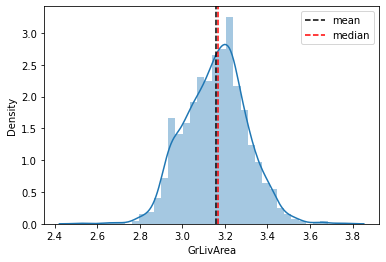

In [16]:
x = np.log10(house_numerical['GrLivArea'])
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color='k', linestyle='--', label='mean')
line2 = plt.axvline(np.median(x), color='r', linestyle='--', label='median')
first_legend = plt.legend(handles=[line1, line2], loc=1)
print('Mean: ', x.mean())
print('Media: ', np.median(x))
print('Std Dev: ', np.std(x))
plt.show

Mean:  500.76214648295866
Media:  484.0
Std Dev:  185.61318324822093


<function matplotlib.pyplot.show(*args, **kw)>

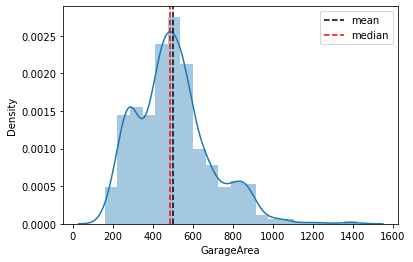

In [17]:
x = house_numerical['GarageArea'][house_numerical['GarageArea']>0]
sns.distplot(x, axlabel=x.name, bins=20)
line1 = plt.axvline(x.mean(), color='k', linestyle='--', label='mean')
line2 = plt.axvline(np.median(x), color='r', linestyle='--', label='median')
first_legend = plt.legend(handles=[line1, line2], loc=1)
print('Mean: ', x.mean())
print('Media: ', np.median(x))
print('Std Dev: ', np.std(x))
plt.show

#### **Penjelasan dan analisis tentang pemrosesan data**

* Dapat dilihat pada variabel GrLivArea dan SalePrice memiliki distribusi normal dengan skala logaritma.
* Pada variabel GarageArea dilakukan tranformasi dengan menghilangkan data 0 dan terlihat distribusi data properti yang memiliki garasi dengan cenderung normal distribusi.

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

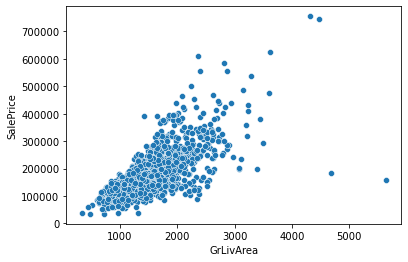

In [18]:
ax = sns.scatterplot(x='GrLivArea', y='SalePrice', data=house_numerical)

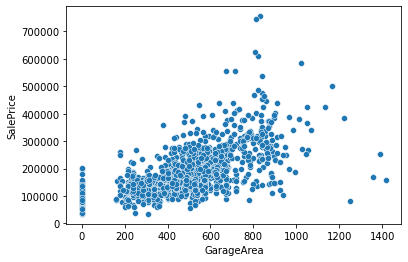

In [19]:
ax = sns.scatterplot(x='GarageArea', y='SalePrice', data=house_numerical)

#### **Hipotesis tentang hubungan antar-variabel**

* Dapat dilihat bahwa SalePrice memiliki korelasi positif dengan GrLivArea dan GarageArea.
* Namun terdapat juga beberapa data anomali berupa pencilan pada ujung kanan data GrLiveArea dan bernilai 0 pada GarageArea.
* Sehingga dapat diketahui bahwa harga properti tinggi dan nilai GrLivArea serta GarageArea juga tinggi.
* Kenapa GrLiveArea dan GarageArea mempengaruhi SalePrice?